In [8]:
# System libraries
from pathlib import Path
import os.path
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
dataset = "/content/drive/MyDrive/Birds_data/train"
walk_through_dir(dataset);

There are 10 directories and 0 images in '/content/drive/MyDrive/Birds_data/train'.
There are 0 directories and 154 images in '/content/drive/MyDrive/Birds_data/train/AFRICAN EMERALD CUCKOO'.
There are 0 directories and 187 images in '/content/drive/MyDrive/Birds_data/train/AFRICAN PIED HORNBILL'.
There are 0 directories and 132 images in '/content/drive/MyDrive/Birds_data/train/ALBATROSS'.
There are 0 directories and 170 images in '/content/drive/MyDrive/Birds_data/train/AMERICAN BITTERN'.
There are 0 directories and 176 images in '/content/drive/MyDrive/Birds_data/train/GOLDEN CHEEKED WARBLER'.
There are 0 directories and 164 images in '/content/drive/MyDrive/Birds_data/train/GRAY KINGBIRD'.
There are 0 directories and 160 images in '/content/drive/MyDrive/Birds_data/train/LONG-EARED OWL'.
There are 0 directories and 150 images in '/content/drive/MyDrive/Birds_data/train/MYNA'.
There are 0 directories and 195 images in '/content/drive/MyDrive/Birds_data/train/RAZORBILL'.
There are 0 

In [4]:
image_dir = Path(dataset)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

In [5]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

<ipython-input-6-002e7fe705df>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='dark:salmon_r')


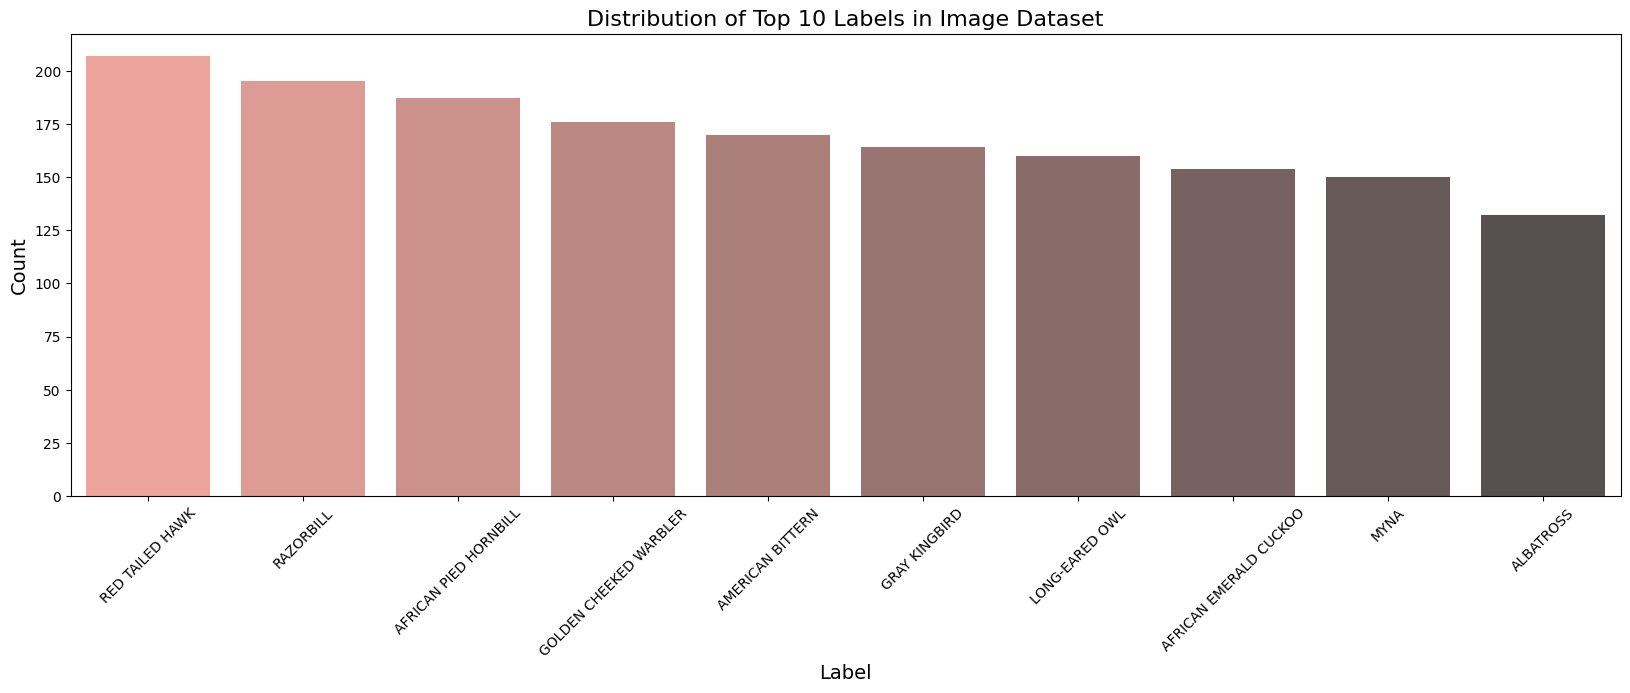

In [6]:
# Get the top 20 labels
label_counts = image_df['Label'].value_counts()[:10]

plt.figure(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='dark:salmon_r')
plt.title('Distribution of Top 10 Labels in Image Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

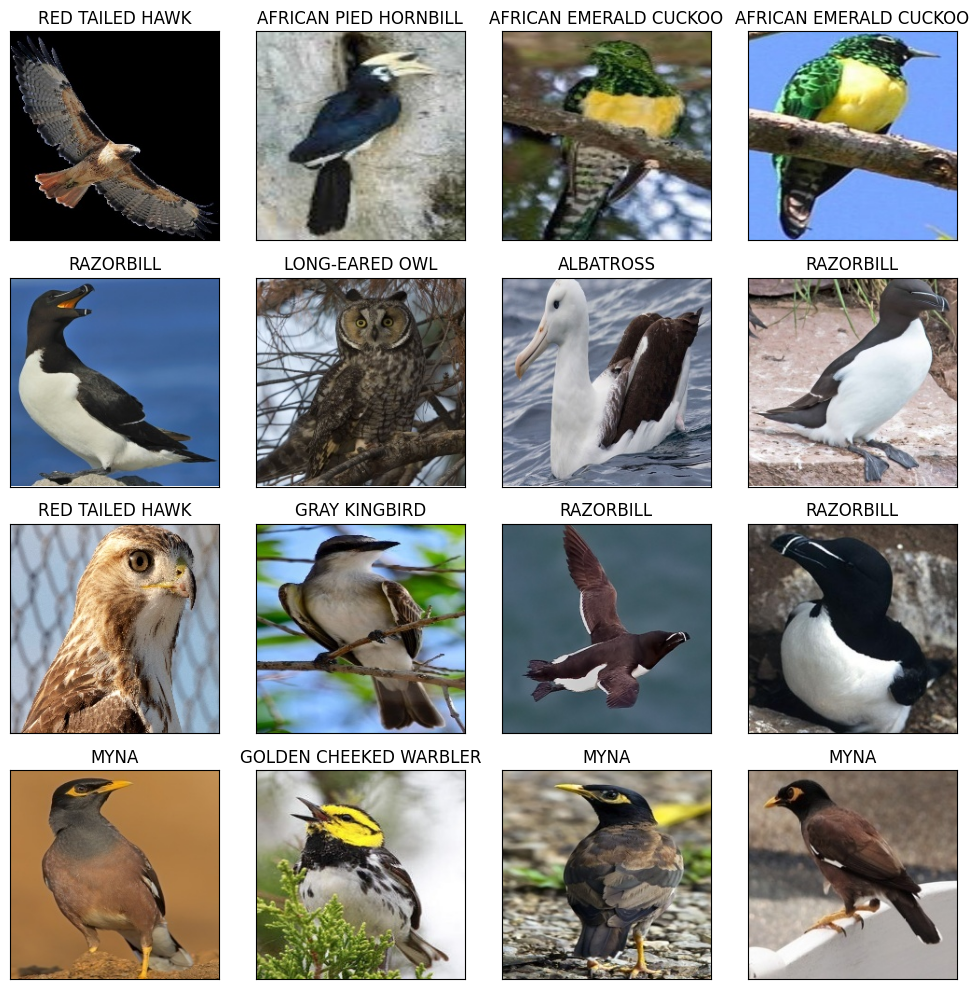

In [9]:
random_index = np.random.randint(0, len(image_df),16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()